## Notebook for data exploration of the ZINC library

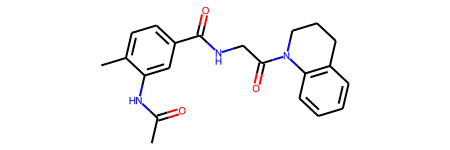

In [34]:
from rdkit import Chem
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

m1 = Chem.MolFromSmiles('Cc1ccc(cc1NC(=O)C)C(=O)NCC(=O)N2CCCc3c2cccc3')
m1

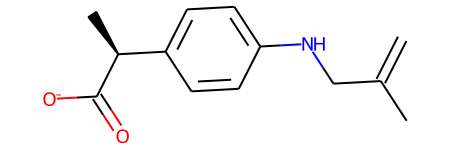

In [2]:
m2 = Chem.MolFromSmiles('C[C@@H](c1ccc(cc1)NCC(=C)C)C(=O)[O-]')
m2

In [3]:
df = pd.read_csv('/Users/drew/data/ZINC/16_prop.xls', sep='\t')
df

,ZINC_ID,MWT,LogP,Desolv_apolar,Desolv_polar,HBD,HBA,tPSA,Charge,NRB,SMILES
0,ZINC00000007,277.364,2.51,9.00,-14.93,0,4,39,0,8,CCN(CC)C(=O)COc1ccc(cc1OC)CC=C
1,ZINC00000017,281.337,1.33,3.07,-19.20,2,6,87,0,4,CCC[S@](=O)c1ccc2c(c1)[nH]/c(=N/C(=O)OC)/[nH]2
2,ZINC00000021,288.411,3.85,4.02,-40.52,1,3,30,1,6,CCC(=O)O[C@]1(CC[NH+](C[C@@H]1CC=C)C)c2ccccc2
3,ZINC00000022,218.276,3.21,0.47,-48.57,1,3,52,-1,5,C[C@@H](c1ccc(cc1)NCC(=C)C)C(=O)[O-]
4,ZINC00000023,250.362,2.58,5.16,-40.25,3,3,46,1,8,CC(C)[NH2+]C[C@H](COc1ccccc1CC=C)O
...,...,...,...,...,...,...,...,...,...,...,...
16403860,ZINC95486398,356.138,4.54,5.26,-3.13,1,4,48,0,5,CC(C)(C)OC(=O)Nc1ccc(cc1OC(F)(F)F)Br
16403861,ZINC95486400,305.232,2.02,4.85,-49.14,1,6,82,-1,5,CN(C)C(=O)NCc1ccc(cc1C(=O)[O-])OC(F)(F)F
16403862,ZINC95486401,312.344,4.19,5.98,-17.05,1,4,55,0,3,CC(C)(C)Oc1ccc2c(c1)c([nH]c(=O)n2)c3ccccc3F
16403863,ZINC95486403,307.065,4.56,4.48,-4.08,1,2,29,0,2,c1cc2c(ccc(c2O)Br)c(c1)OC(F)(F)F


In [4]:
features = ['MWT', 'LogP', 'Desolv_apolar', 'Desolv_polar', 'HBD', 'HBA', 'tPSA', 'Charge', 'NRB']

for feature in features:
    print('{} has {} unique elements'.format(feature, df[feature].nunique()))

MWT has 189089 unique elements
LogP has 1578 unique elements
Desolv_apolar has 3948 unique elements
Desolv_polar has 19703 unique elements
HBD has 20 unique elements
HBA has 19 unique elements
tPSA has 275 unique elements
Charge has 11 unique elements
NRB has 36 unique elements


In [5]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,MWT,LogP,Desolv_apolar,Desolv_polar,HBD,HBA,tPSA,Charge,NRB
count,16403865.00000,16403865.00000,16403865.00000,16403865.00000,16403865.00000,16403865.00000,16403865.00000,16403865.00000,16403865.00000
mean,341.22565,2.85395,6.33111,-24.79782,1.49703,5.10338,63.17547,0.24943,5.33381
std,68.20613,1.41373,3.86705,19.43122,1.09004,1.68266,22.08640,0.55401,2.03306
min,55.08000,-5.94000,-56.17000,-542.61000,0.00000,0.00000,0.00000,-5.00000,0.00000
25%,295.38900,1.95000,4.28000,-38.09000,1.00000,4.00000,48.00000,0.00000,4.00000
50%,340.42300,2.86000,6.82000,-16.39000,1.00000,5.00000,63.00000,0.00000,5.00000
75%,378.88100,3.74000,8.88000,-11.82000,2.00000,6.00000,77.00000,1.00000,7.00000
max,566.95200,11.39000,28.62000,0.66000,20.00000,18.00000,317.00000,5.00000,35.00000


16403865


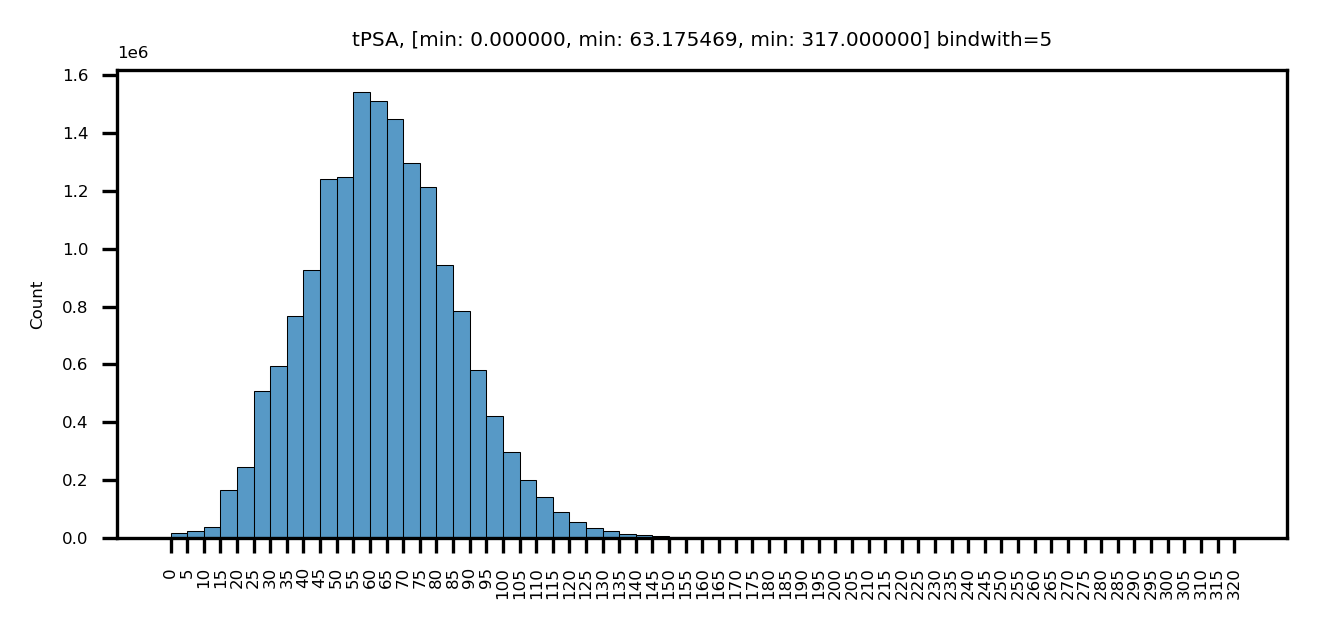

In [31]:
feature = 'tPSA'
feature_list = df[feature].tolist()
print(len(feature_list))

plt.rcParams.update({'font.size': 4,
                     'xtick.labelsize': 4,
                     'ytick.labelsize': 4,
                     'grid.linestyle': '-',
                     'grid.linewidth': .33,
                     'legend.framealpha': 1,
                     'legend.facecolor': 'white',
                     'legend.shadow': False})

fig = plt.figure(figsize=(5,2), dpi=300)
ax = fig.add_axes([0.12, 0.12, 0.78, 0.78])

binwidth = 5
# binwidth = binwidthDict[feature]
plt.title(('{}, [min: {:2f}, min: {:2f}, min: {:2f}] bindwith={}'.format(feature, df[feature].min(), df[feature].mean(), df[feature].max(), binwidth)))

ax = sns.histplot(x=feature_list, edgecolor='k', linewidth=0.25, binwidth=binwidth)

mids = [rect.get_x() + rect.get_width() / 2 for rect in ax.patches]
edges = [rect.get_x() for rect in ax.patches] + [ax.patches[-1].get_x() + ax.patches[-1].get_width()]
ax.set_xticks(sorted(set(edges)))

ax.tick_params(axis='x', rotation=90, labelsize=4, color='black', grid_color='grey', grid_alpha=0.5)

plt.savefig('figures/Dist_feature_{}.png'.format(feature), dpi=300, bbox_inches='tight')

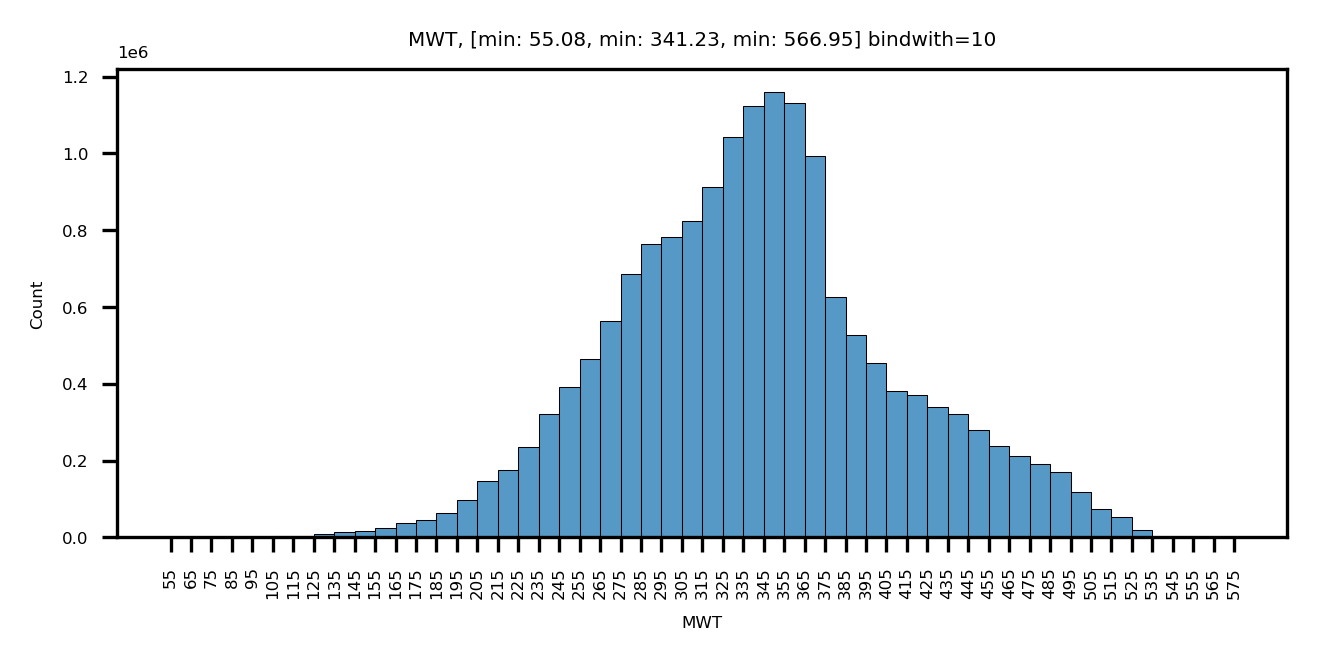

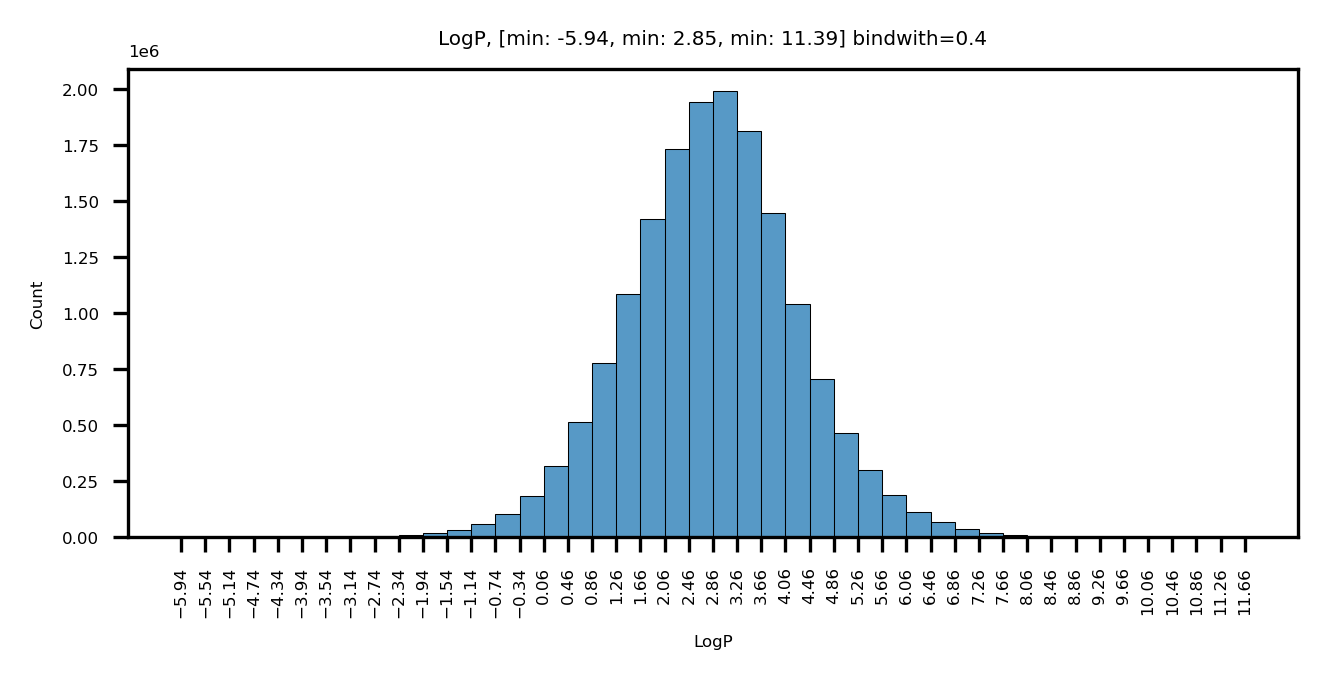

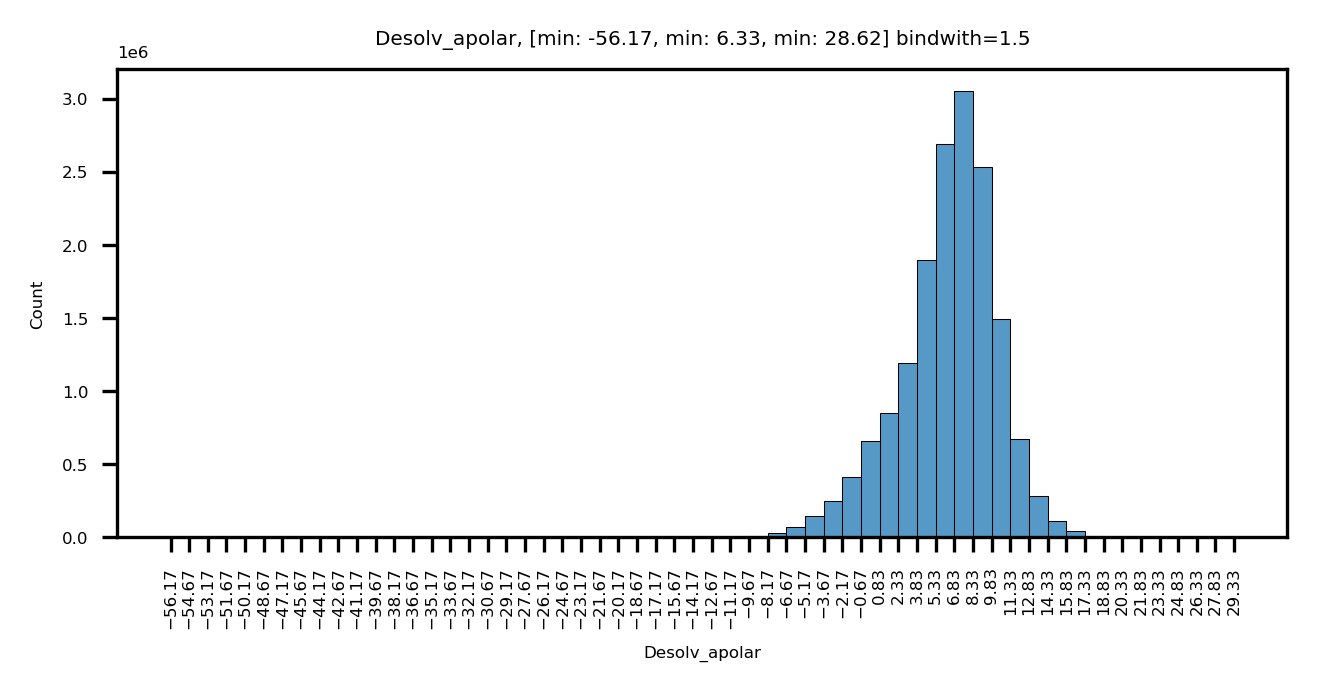

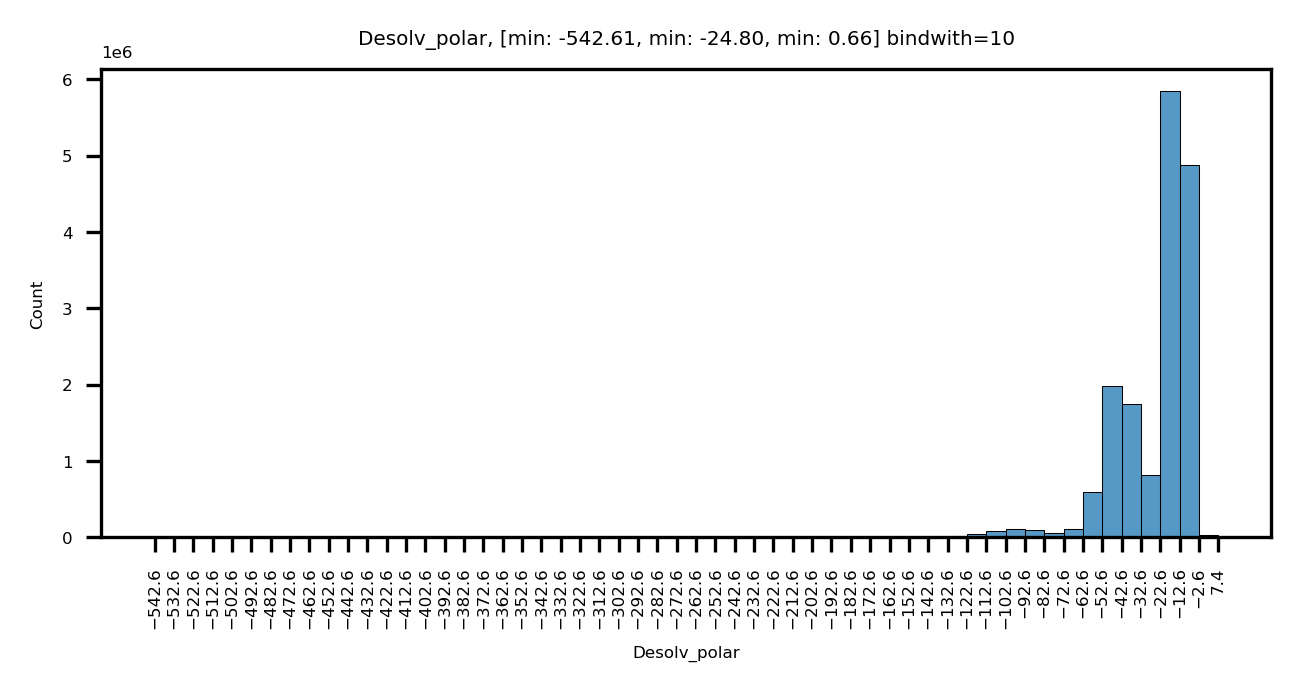

In [26]:
features = ['MWT', 'LogP', 'Desolv_apolar', 'Desolv_polar', 'tPSA']

binwidthDict = {'MWT': 10,
                'LogP': 0.4,
                'Desolv_apolar': 1.5,
                'Desolv_polar': 10,
                'tPSA': 5}

for feature in features:
    plt.rcParams.update({'font.size': 4,
                         'xtick.labelsize': 4,
                         'ytick.labelsize': 4,
                         'grid.linestyle': '-',
                         'grid.linewidth': .33,
                         'legend.framealpha': 1,
                         'legend.facecolor': 'white',
                         'legend.shadow': False})
    
    fig = plt.figure(figsize=(5,2), dpi=300)
    ax = fig.add_axes([0.12, 0.12, 0.78, 0.78])
    
    binwidth = binwidthDict[feature]
    plt.title(('{}, [min: {:.2f}, min: {:.2f}, min: {:.2f}] bindwith={}'.format(feature, df[feature].min(), df[feature].mean(), df[feature].max(), binwidth)))
    
    ax = sns.histplot(data=df, x=feature, edgecolor='k', linewidth=0.25, binwidth=binwidth)
    
    mids = [rect.get_x() + rect.get_width() / 2 for rect in ax.patches]
    edges = [rect.get_x() for rect in ax.patches] + [ax.patches[-1].get_x() + ax.patches[-1].get_width()]
    ax.set_xticks(sorted(set(edges)))
    
    ax.tick_params(axis='x', rotation=90, labelsize=4, color='black', grid_color='grey', grid_alpha=0.5)
    
    plt.savefig('figures/Dist_feature_{}.png'.format(feature), dpi=300, bbox_inches='tight')

16403865


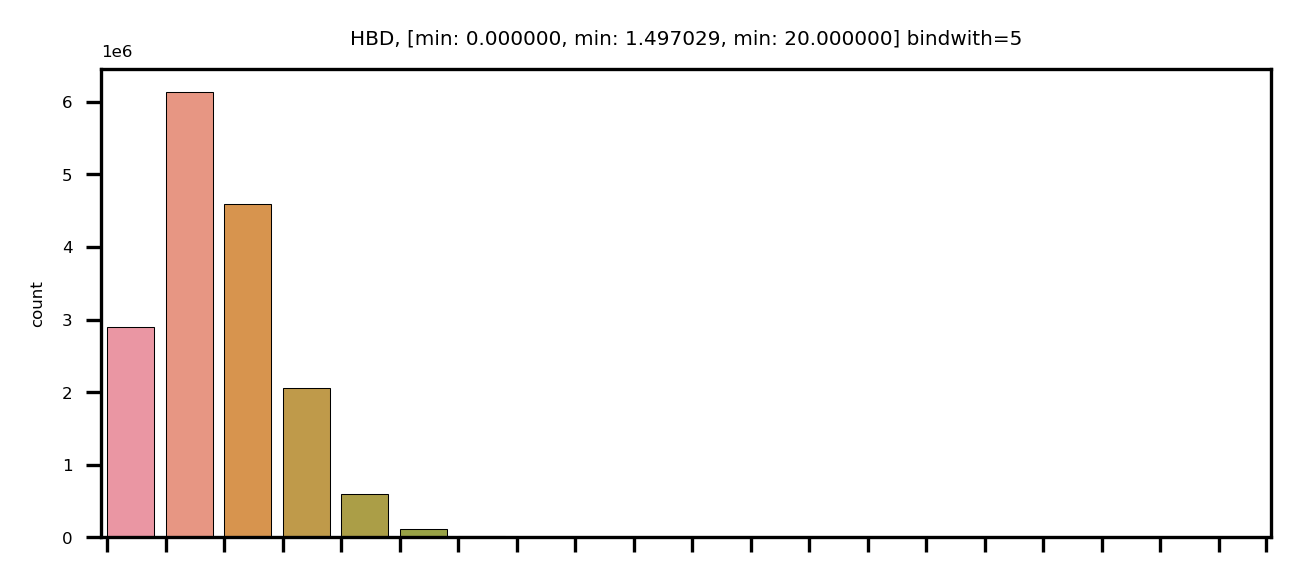

In [32]:
feature = 'HBD'
feature_list = sorted(df[feature].tolist())
print(len(feature_list))



plt.rcParams.update({'font.size': 4,
                     'xtick.labelsize': 4,
                     'ytick.labelsize': 4,
                     'grid.linestyle': '-',
                     'grid.linewidth': .33,
                     'legend.framealpha': 1,
                     'legend.facecolor': 'white',
                     'legend.shadow': False})

fig = plt.figure(figsize=(5,2), dpi=300)
ax = fig.add_axes([0.12, 0.12, 0.78, 0.78])

binwidth = 5
# binwidth = binwidthDict[feature]
plt.title(('{}, [min: {:2f}, min: {:2f}, min: {:2f}] bindwith={}'.format(feature, df[feature].min(), df[feature].mean(), df[feature].max(), binwidth)))

ax = sns.countplot(x=feature_list, edgecolor='k', linewidth=0.25)

mids = [rect.get_x() + rect.get_width() / 2 for rect in ax.patches]
edges = [rect.get_x() for rect in ax.patches] + [ax.patches[-1].get_x() + ax.patches[-1].get_width()]
ax.set_xticks(sorted(set(edges)))

ax.tick_params(axis='x', rotation=90, labelsize=4, color='black', grid_color='grey', grid_alpha=0.5)

plt.savefig('figures/Dist_feature_{}.png'.format(feature), dpi=300, bbox_inches='tight')

<AxesSubplot:>

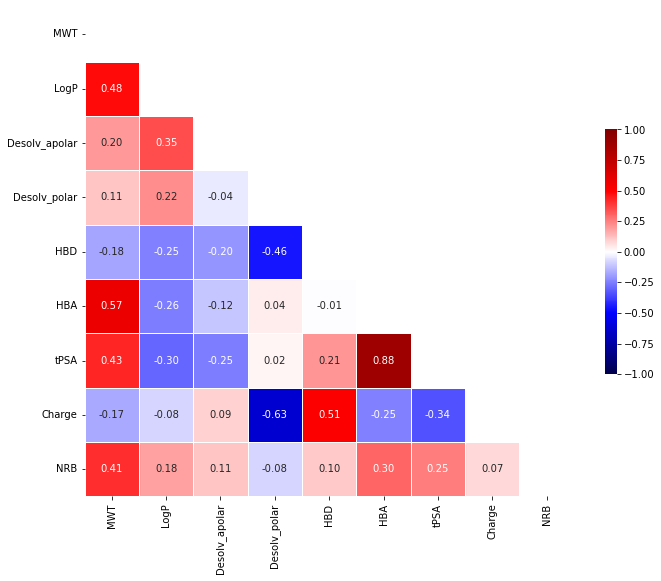

In [38]:
plt.rcParams.update({'font.size': 10,
                     'xtick.labelsize': 10,
                     'ytick.labelsize': 10,
                     'grid.linestyle': '-',
                     'grid.linewidth': .33,
                     'legend.framealpha': 1,
                     'legend.facecolor': 'white',
                     'legend.shadow': False})

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='seismic', vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})